In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv


In [2]:
df = pd.read_csv("/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv")

In [3]:
df

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [5]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [6]:
df2= df.dropna().copy()

In [7]:
df2.isnull().sum()

review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
user_gender          0
app_version          0
dtype: int64

In [8]:
df2.duplicated().sum()

0

In [9]:
df2.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [10]:
df2= df2.drop(columns=['review_id', 'review_text','review_language','review_date','app_version','num_helpful_votes','verified_purchase'])


In [11]:
df2

,user_id,app_name,app_category,rating,device_type,user_age,user_country,user_gender
0,1967825,MX Player,Travel & Local,1.3,Android Tablet,14.0,China,Female
1,9242600,Tinder,Navigation,1.6,iPad,18.0,Germany,Male
2,7636477,Netflix,Dating,3.6,iPad,67.0,Nigeria,Male
3,209031,Venmo,Productivity,3.8,iOS,66.0,India,Female
4,7190293,Google Drive,Education,3.2,iPad,40.0,South Korea,Prefer not to say
...,...,...,...,...,...,...,...,...
2504,1893332,Lyft,Music & Audio,2.1,Android,59.0,Germany,Male
2505,9515213,Signal,Music & Audio,4.2,iPad,70.0,Bangladesh,Female
2506,1475880,TikTok,News & Magazines,4.1,iPad,29.0,Nigeria,Female
2509,2322118,OneDrive,Business,3.0,iOS,21.0,Malaysia,Non-binary


**NOW OUR DATA IS CLEANED AND WE HAVE USEFULL COLUMNS WHICH WILL HELP TO CREATE USEFULL PLOTS****# 

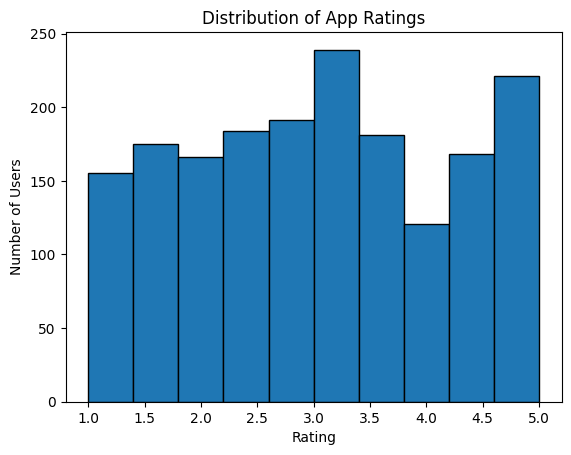

In [12]:
import matplotlib.pyplot as plt

plt.hist(df2['rating'], bins=10, edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

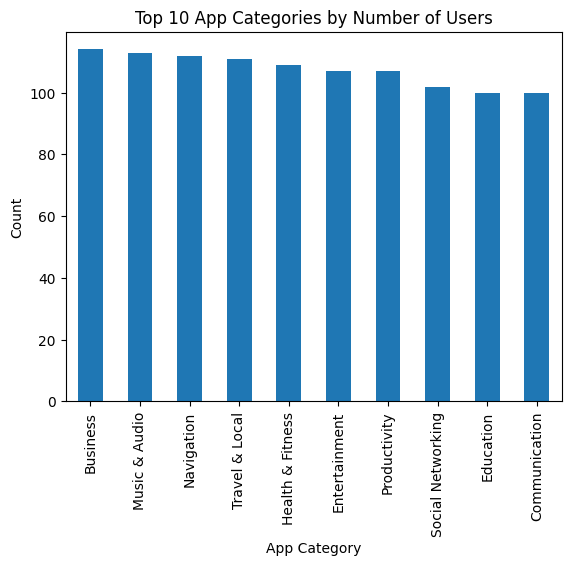

In [13]:
df2['app_category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 App Categories by Number of Users')
plt.xlabel('App Category')
plt.ylabel('Count')
plt.show()


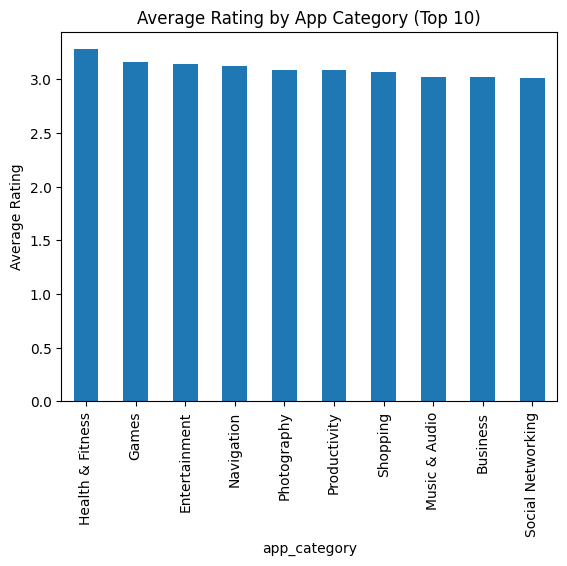

In [14]:
df2.groupby('app_category')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Rating by App Category (Top 10)')
plt.ylabel('Average Rating')
plt.show()


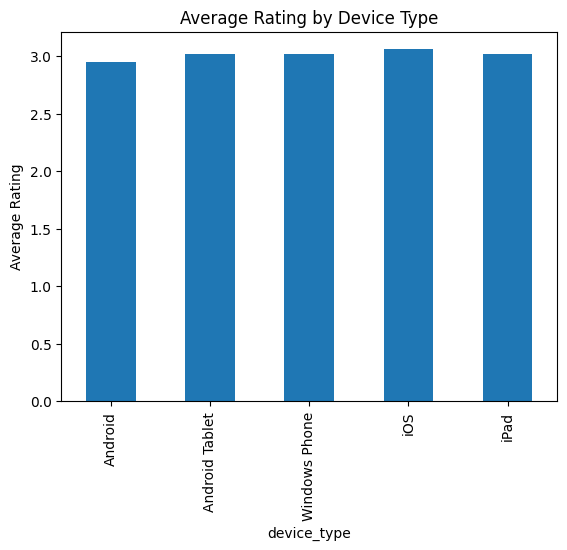

In [15]:
df2.groupby('device_type')['rating'].mean().plot(kind='bar')
plt.title('Average Rating by Device Type')
plt.ylabel('Average Rating')
plt.show()

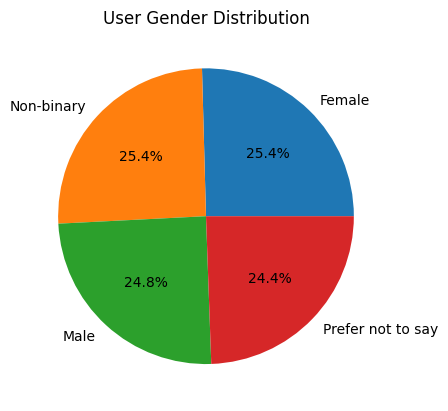

In [16]:
df2['user_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('User Gender Distribution')
plt.ylabel('')
plt.show()

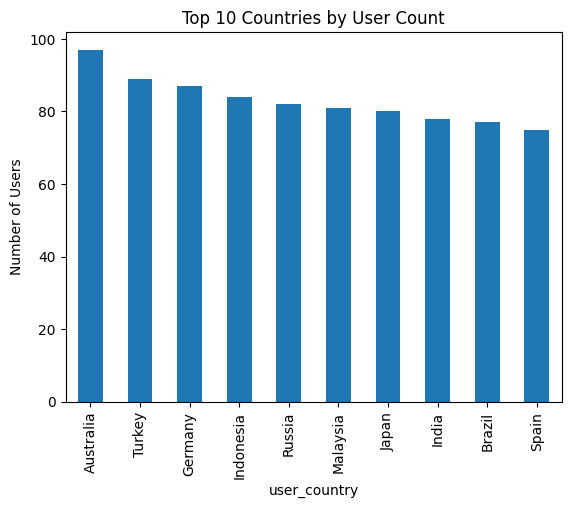

In [17]:
df2['user_country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by User Count')
plt.ylabel('Number of Users')
plt.show()


In [18]:
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
expected_cols = ['user_id','app_name','app_category','rating','device_type','user_age','user_country','user_gender']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

# Coerce numerics
df2 = df2.copy()
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
df2['user_age'] = pd.to_numeric(df2['user_age'], errors='coerce')

# Basic sanity filters (tweak if needed)
df2 = df2[(df2['rating'] >= 0) & (df2['rating'] <= 5)]
df2 = df2[(df2['user_age'] >= 5) & (df2['user_age'] <= 100)]

# Trim whitespace & fill simple NAs
for c in ['app_name','app_category','device_type','user_country','user_gender']:
    df2[c] = df2[c].astype(str).str.strip().replace({'nan':'Unknown'})
df2['app_category'] = df2['app_category'].replace('', 'Unknown')

# Helper: top-k categories/apps to reduce clutter in some plots
TOP_K_CAT = 10
TOP_K_APPS = 15
top_cats = df2['app_category'].value_counts().head(TOP_K_CAT).index
top_apps = df2['app_name'].value_counts().head(TOP_K_APPS).index


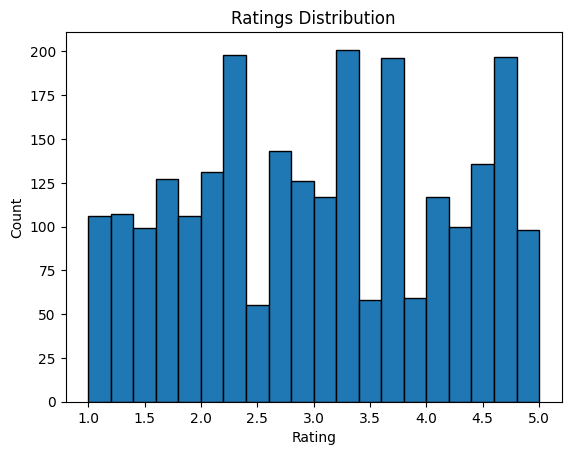

In [20]:
# 1) Ratings distribution (hist)
plt.figure()
plt.hist(df['rating'].dropna(), bins=20, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating'); plt.ylabel('Count')
plt.show()

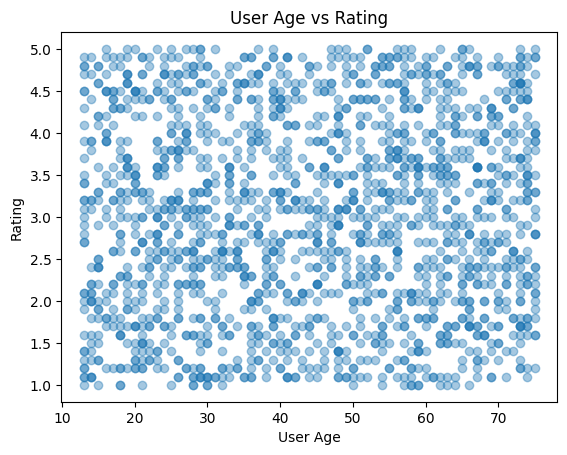

In [21]:
plt.figure()
plt.scatter(df2['user_age'], df2['rating'], alpha=0.4)
plt.title('User Age vs Rating')
plt.xlabel('User Age'); plt.ylabel('Rating')
plt.show()

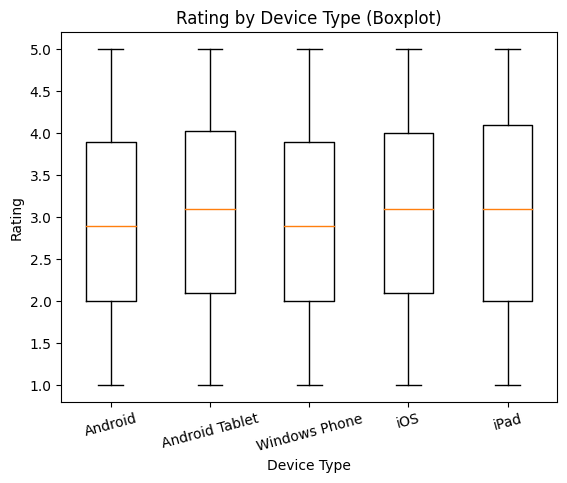

In [22]:
plt.figure()
# Prepare data for boxplot
groups = [g['rating'].dropna().values for _, g in df.groupby('device_type')]
labels = list(df2.groupby('device_type').groups.keys())
plt.boxplot(groups, labels=labels, vert=True, showfliers=False)
plt.title('Rating by Device Type (Boxplot)')
plt.ylabel('Rating'); plt.xlabel('Device Type')
plt.xticks(rotation=15)
plt.show()

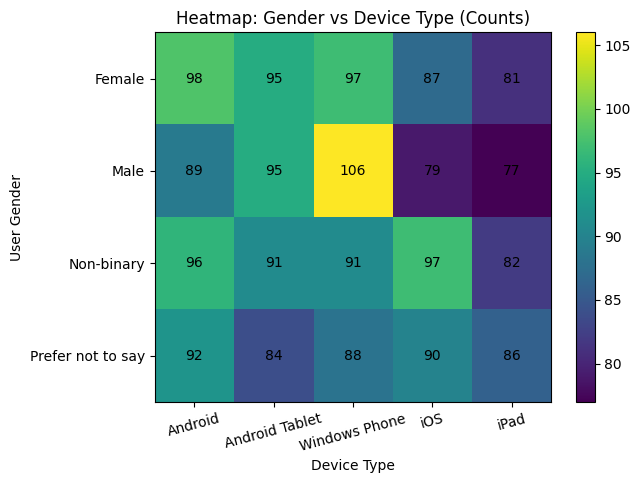

In [23]:
pivot = pd.crosstab(df2['user_gender'], df2['device_type'])
plt.figure()
plt.imshow(pivot.values, aspect='auto')
plt.title('Heatmap: Gender vs Device Type (Counts)')
plt.xlabel('Device Type'); plt.ylabel('User Gender')
plt.xticks(range(pivot.shape[1]), pivot.columns, rotation=15)
plt.yticks(range(pivot.shape[0]), pivot.index)
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        plt.text(j, i, str(pivot.values[i, j]), ha='center', va='center')
plt.colorbar()
plt.show()

In [24]:
fig = px.histogram(df, x='rating', facet_col='device_type', nbins=20, title='Ratings by Device Type (Interactive)')
fig.show()

In [25]:
fig = px.box(df, x='user_gender', y='rating', points='all', title='Rating by Gender (Interactive)')
fig.show()


In [26]:
df_topcat = df2[df2['app_category'].isin(top_cats)]
fig = px.violin(df_topcat, x='app_category', y='rating', box=True, points='all', title='Rating by App Category (Top 10) – Violin')
fig.update_xaxes(tickangle=30)
fig.show()

In [27]:
df_treemap = df2[df2['app_category'].isin(top_cats) & df['app_name'].isin(top_apps)]
fig = px.treemap(df_treemap, path=['app_category','app_name'], title='Treemap: Category → App (Top)')
fig.show()

/tmp/ipykernel_13/2038702127.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [28]:
app_counts = df2['app_name'].value_counts().head(TOP_K_APPS).reset_index()
app_counts.columns = ['app_name','users']
fig = px.bar(app_counts, x='app_name', y='users', title='Top Apps by Users (Interactive)')
fig.update_xaxes(tickangle=30)
fig.show()


In [29]:
country_counts = df2['user_country'].value_counts().reset_index()
country_counts.columns = ['user_country','users']
fig = px.choropleth(country_counts, locations='user_country', locationmode='country names',
                    color='users', hover_name='user_country', title='Users by Country (Interactive)')
fig.show()

In [30]:
df_small = df2.copy()
# Reduce cardinality to keep it readable
df_small.loc[~df_small['app_category'].isin(top_cats), 'app_category'] = 'Other'
fig = px.parallel_categories(df_small, dimensions=['user_gender','device_type','app_category'],
                             title='Parallel Categories: Gender × Device × Category')
fig.show()

In [31]:
fig = px.density_heatmap(df2, x='user_age', y='rating', nbinsx=30, nbinsy=20, title='Density Heatmap: Age vs Rating (Interactive)')
fig.show()

In [32]:
print('--- Quick Stats ---')
print('Users:', len(df))
print('Unique apps:', df["app_name"].nunique())
print('Unique categories:', df["app_category"].nunique())
print('Avg rating:', round(df["rating"].mean(), 3))
print('Median rating:', round(df["rating"].median(), 3))
print('Avg age:', round(df["user_age"].mean(), 2))
print('\nTop 5 categories by count:\n', df['app_category'].value_counts().head(5))
print('\nTop 5 countries by count:\n', df['user_country'].value_counts().head(5))

--- Quick Stats ---
Users: 2514
Unique apps: 41
Unique categories: 18
Avg rating: 3.021
Median rating: 3.0
Avg age: 44.25

Top 5 categories by count:
 app_category
Entertainment       167
Navigation          161
Travel & Local      159
Health & Fitness    155
Music & Audio       152
Name: count, dtype: int64

Top 5 countries by count:
 user_country
Australia    128
Germany      119
Turkey       115
Indonesia    114
Italy        112
Name: count, dtype: int64
